# Практика
Неявка на прием к врачу — серьезная проблема в сфере общественного здравоохранения. Пропущенные приемы обходятся системе здравоохранения в США почти в [200 долларов каждый](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Поэтому неудивительно, что снижение количества неявок стало приоритетом в Соединенных Штатах и во всем мире. Были проведены [многочисленные исследования](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) с целью определения наиболее эффективных средств снижения показателей невыхода на работу. Первым шагом к решению проблемы является понимание того, почему пациент пропускает запланированное посещение.

[Данные](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE), 

Описание данных можно найти на [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

Мы хотим ответить по существу на два вопроса:


1.   Каков портрет человека, пропускающего запланированные визиты к врачу?
2.   Какие факторы влияют на неявку?

Держите это в голове. Свои ответы сопровождайте графиками, не забывайте подписывать оси, и заголовки, а также выбирайте не тот тип визуализации, который вы поняли как работает, а тот, который подходит именно для задачи.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
df.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


#### Задание 1
Проверьте данные на пропуски и выбросы

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


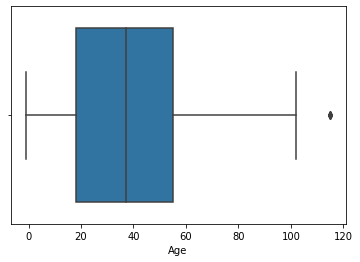

In [ ]:
#проверка данных на выбросы, кмк возраст более 100 лет и есть выбросы
sns.boxplot(df['Age'])


In [ ]:
#нет пропусков в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Задание 2
Приведите колонки к правильным типам данных (по крайней мере временные)

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv',
                    dtype={ 'PatientId': np.object,
                    'AppointmentID': np.int64, 'Age' : np.int8,'Handcap' : np.int8, 'Alcoholism':np.int8},
                parse_dates=['ScheduledDay',
                             'AppointmentDay'])
#меняем типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int8               
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int8               
 11  Handcap         110527 non-null  int8               
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### Задание 3
Проверьте диапазоны значений возраста (Age)

Есть ли записи, которые кажутся вам подозрительными?
Стоит ли эти записи оставить или стоит убрать? Почему вы так думаете (в решении этого вопроса может помочь описание данных на сайте kaggle)?

In [ ]:
 #df.describe()
 df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int8)

In [ ]:
# запись с возратсом -1 точно какая-то ошибка, в от записи с возрастом 0 думаю это младенцы до года, соотвтственно убирать эти записи нельзя

#### Задание 4
Уникальные ли пациенты в нашей таблице? Мы имеем дело со списком разовых приемов или по крайней мере часть из них регулярные?

In [ ]:
#записи о приемах уникальны, то есть один пациент может иметь несколько приемов
df['AppointmentID'].nunique()

110527

In [ ]:
#количество пациентов почти на половину меньше количества визитов, следовательно есть повторные визиты
df['PatientId'].nunique()

62299

In [ ]:
#посчитаю количество визитов для каждого пациента, и вывожу аналитическую справку, как видим есть максимум 88 визитов, но большинство в диапазоне 1-2
df1=df.groupby('PatientId').count()['AppointmentID']
df1.describe()

count    62299.000000
mean         1.774138
std          1.770324
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: AppointmentID, dtype: float64

In [ ]:
best = pd.cut(df1, [0,1,88],labels=['one','repeat'])
best

PatientId
11111462625267        one
111124532532143    repeat
11114485119737        one
11116239871275        one
1111633122891      repeat
                    ...  
999968578354866       one
9999737245272      repeat
999981631772427       one
9999951146446      repeat
99999967293459        one
Name: AppointmentID, Length: 62299, dtype: category
Categories (2, object): ['one' < 'repeat']

In [ ]:
df=df.merge(df1,how='left',left_on='PatientId',right_on='PatientId',suffixes=('', '_'))
df=df.rename({'AppointmentID_': 'amount'}, axis=1)


In [ ]:
df.head(25)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,amount
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,56394729949972,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,1
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1


#### Задание 5
Если у нас имеются неоднократные посещения, влияет ли как-то номер (1-ый 2-ой 3-ий...) приёма на явку? Где прогулы происходят чаще, для регулярных посещений или для разовых? В решении этого задания вам может помочь функция [.rank()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.GroupBy.rank.html) 

[stackoverflow](https://stackoverflow.com/questions/33899369/ranking-order-per-group-in-pandas)

In [ ]:
#я не оч поняла про корреляцию, пошла просто, вывела процент приходящих и не приходящих от общей массы
show = df.groupby(['No-show']).size()[0]/(df.groupby(['No-show']).size()[0]+df.groupby(['No-show']).size()[1])
print("Процент пациентов, которые приходят - {:.2f}%".format(show*100))
noshow = df.groupby(['No-show']).size()[1]/(df.groupby(['No-show']).size()[0]+df.groupby(['No-show']).size()[1])
print("Процент пациентов, которые не приходят - {:.2f}%".format(noshow*100))
print(df.groupby(['No-show']).size())

Процент пациентов, которые приходят - 79.81%
Процент пациентов, которые не приходят - 20.19%
No-show
No     88208
Yes    22319
dtype: int64


In [ ]:
df['amount'].unique()

array([ 2,  1,  6,  3,  5,  7,  4,  8, 14,  9, 13, 12, 11, 10, 20, 15, 16,
       29, 54, 17, 19, 35, 21, 18, 23, 55, 40, 30, 88, 70, 46, 62, 34, 57,
       51, 65, 84, 38, 37, 22, 42, 33, 50, 24])

In [ ]:
df[df.PatientId=='12154843752835']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,amount
21,12154843752835,5628338,F,2016-04-27 10:50:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes,6
27,12154843752835,5628345,F,2016-04-27 10:51:45+00:00,2016-04-29 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,No,6
51197,12154843752835,5646344,F,2016-05-02 11:16:02+00:00,2016-05-05 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,No,6
51200,12154843752835,5676612,F,2016-05-09 16:02:48+00:00,2016-05-19 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes,6
68608,12154843752835,5616843,F,2016-04-25 14:53:10+00:00,2016-05-05 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,1,No,6
68610,12154843752835,5676609,F,2016-05-09 16:02:03+00:00,2016-05-19 00:00:00+00:00,4,CONQUISTA,0,0,0,0,0,0,Yes,6


проверила что верно считает ранг количество приемов для пациента


In [ ]:
r=df[['PatientId','AppointmentID']]
r=r.groupby('PatientId').rank(method='min',axis=1)
df['rank']=r
#df=df.merge(r,left_index=True,right_index=True,suffixes=('', '_y'))
#df=df.rename({'AppointmentID_y': 'Ap_num'}, axis=1)

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,amount,rank
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2,2.0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2,2.0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2,2.0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2,2.0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,1.0


In [ ]:
# процент неявки относительно номера посещения
a=df.groupby(['rank', 'No-show']).count().unstack()['amount']
a.insert(2, 'Percent', round(a['Yes']/(a['Yes']+a['No'])*100))
a=a.reset_index()
a.set_index('rank')
a

No-show,rank,No,Yes,Percent
0,1.0,49321.0,12978.0,21.0
1,2.0,19617.0,4762.0,20.0
2,3.0,8417.0,2067.0,20.0
3,4.0,4002.0,982.0,20.0
4,5.0,2077.0,540.0,21.0
...,...,...,...,...
83,84.0,2.0,NaN,NaN
84,85.0,1.0,NaN,NaN
85,86.0,1.0,NaN,NaN
86,87.0,1.0,NaN,NaN


Text(0.5, 0, 'Количество приемов')

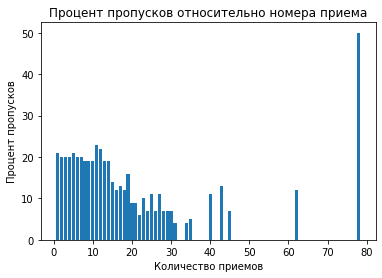

In [ ]:
#в случае если на первый прием человек не пришел, то назначается второй
plt.bar(a['rank'],a['Percent'])
plt.title('Процент пропусков относительно номера приема')
plt.ylabel('Процент пропусков')
plt.xlabel('Количество приемов')

#### Задание 6
Исследуйте влияние возраста на явку. Удобно использовать функцию [pd.cut](https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut) для создания интервалов. 

In [ ]:
# убираю из данных значение -1 
df = df[df['Age'] >= 0] 
age = pd.cut(df['Age'], [0,1,18,45,65,80,115],labels=['baby','child','young','middle-aged','senior citizen','elderly'])
df=df.merge(age,left_index=True,right_index=True, suffixes=('', '-t'))
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,amount,rank,Age-t
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2,2.0,middle-aged
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2,2.0,middle-aged
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2,2.0,middle-aged
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2,2.0,child
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,1.0,middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,2,2.0,middle-aged
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,4,3.0,middle-aged
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,1.0,young
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,1.0,young


In [ ]:
#считаем процент по группам возрастов
f=df.groupby(['Age-t','No-show']).count().unstack()['amount']
f.insert(2, 'Percent', round(f['Yes']/(f['Yes']+f['No'])*100))
f=f.reset_index()
f.set_index('Age-t')
f

No-show,Age-t,No,Yes,Percent
0,baby,1858,415,18.0
1,child,17761,5293,23.0
2,young,29884,8835,23.0
3,middle-aged,24569,5071,17.0
4,senior citizen,8852,1597,15.0
5,elderly,2383,469,16.0


Text(0.5, 0, 'Группы по возрасту')

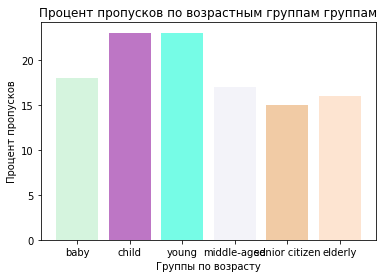

In [ ]:
import matplotlib.pyplot as plt
color_rectangle = np.random.rand(9, 4)  
plt.bar(f['Age-t'], f['Percent'], color =color_rectangle )
plt.title('Процент пропусков по возрастным группам группам')
plt.ylabel('Процент пропусков')
plt.xlabel('Группы по возрасту')


#### Задание 7
К разбивке по возрастам, добавьте разбивку по полу. Может быть один пол прогуливает приемы чаще другого? Во всех ли возрастных группах мы можем уверенно сравнивать шанс пропуска (иными словами, нет ли в какой-нибудь из групп перекоса в сторону мужчин или женщин по кол-ву записей о приемах)?

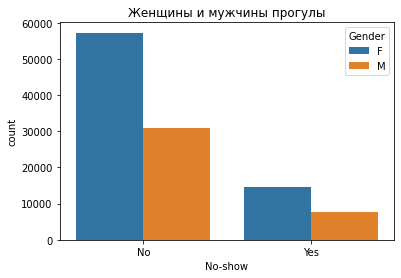

In [ ]:
#начала с постороения общей диаграммы соотношения прогулов по полу, видно мужчины реже лечатся и меньше прогуливают соответственно
sns.countplot(x=df['No-show'], hue=df['Gender']);
plt.title('Женщины и мужчины прогулы');

In [ ]:
#пробуем посмотреть проценты прогулов внутри групп по возрасту и полу
a=df.groupby(['Age-t','Gender', 'No-show']).count().unstack()['amount']
a.insert(2, 'Percent', round(a['Yes']/(a['Yes']+a['No'])*100))
#a=a.reset_index()
#a.set_index('Age-t')
a

No-show                   No   Yes  Percent
Age-t          Gender                      
baby           F         886   202     19.0
               M         972   213     18.0
child          F        9356  2789     23.0
               M        8405  2504     23.0
young          F       21420  6380     23.0
               M        8464  2455     22.0
middle-aged    F       16652  3506     17.0
               M        7917  1565     17.0
senior citizen F        5916  1082     15.0
               M        2936   515     15.0
elderly        F        1613   316     16.0
               M         770   153     17.0

делаю вывод что дети и молодые люди пропускают чаще всего, меньше всего пропускают прием оч пожилые люди и довольно старые
Кстати данное распределение по группам возраста тоже может быть различным, я исходила то есть старость и глубокая старость, в нашей стране скажем, анализ группы возраста глубокой старости был бы не актуален в виду малого количества


#### Задание 8
Исследуйте влияние времени ожидания приёма на явку

In [ ]:
#посчитаем разницу между датой записи и датой приема, существуют минуссовые разницы и самое большое отклонение 178 дней
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days
df['Waiting_Time_days'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Waiting_Time_days, dtype: float64

In [ ]:
#Принимаю решение минусы заменить на 0
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])
df['Waiting_Time_days'].describe()
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,amount,rank,Age-t,Waiting_Time_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2,2.0,middle-aged,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2,2.0,middle-aged,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2,2.0,middle-aged,-1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2,2.0,child,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,1.0,middle-aged,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,2,2.0,middle-aged,34
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,4,3.0,middle-aged,34
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,1.0,young,40
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,1.0,young,40


In [ ]:
a=df.groupby(['Waiting_Time_days', 'No-show']).count().unstack()['amount']
a.insert(2, 'Percent', round(a['Yes']/(a['Yes']+a['No'])*100))
a=a.reset_index()
a.set_index('Waiting_Time_days')
a


No-show,Waiting_Time_days,No,Yes,Percent
0,-7,NaN,1.0,NaN
1,-2,NaN,4.0,NaN
2,-1,36770.0,1792.0,5.0
3,0,4100.0,1113.0,21.0
4,1,5123.0,1602.0,24.0
...,...,...,...,...
126,154,4.0,6.0,60.0
127,161,9.0,2.0,18.0
128,168,7.0,1.0,12.0
129,175,10.0,6.0,38.0


Text(0, 0.5, 'Процент пропусков')

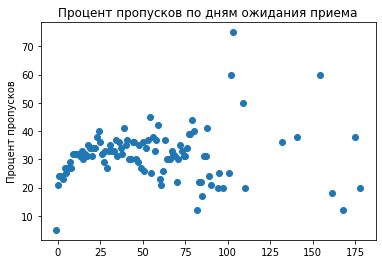

In [ ]:
plt.scatter(a.Waiting_Time_days,a.Percent)
import matplotlib.pyplot as plt


plt.title('Процент пропусков по дням ожидания приема')
plt.ylabel('Процент пропусков')


In [ ]:
a.describe()

No-show,Waiting_Time_days,No,Yes,Percent
count,131.00000,124.000000,113.000000,106.000000
mean,65.21374,711.346774,197.513274,31.622642
std,43.72484,3378.457961,338.810633,9.244255
min,-7.00000,1.000000,1.000000,5.000000
25%,29.50000,7.000000,8.000000,27.000000
50%,62.00000,62.000000,35.000000,32.000000
75%,94.50000,456.000000,270.000000,36.000000
max,178.00000,36770.000000,1792.000000,75.000000


In [ ]:
# 
y=a['Yes']
x=a['Waiting_Time_days']
x.corr(y)


-0.5950915224093529

#### Задание 9
В общем по выборке влияет ли СМС на явку?

In [ ]:
#посчитала процент от общей массы пришедших и не пришедших получивших либо нет СМС, скорее обратная зависимость, получили и смс и не пришли ? 
a=df.groupby(['SMS_received', 'No-show']).count().unstack()['amount']
a.insert(2, 'Percent', round(a['Yes']/(a['Yes']+a['No'])*100))
a=a.reset_index()
a.set_index('SMS_received')
a



No-show,SMS_received,No,Yes,Percent
0,0,62509,12535,17.0
1,1,25698,9784,28.0


In [ ]:
#две точки на графике 
y=a['Yes']
x=a['SMS_received']
x.corr(y)


-1.0

#### Задание 10
Исследуйте влияние отправки СМС на явку среди прогульщиков. Прогульщиком назовем тех, кто хотя бы раз пропускал прием

In [ ]:
ab=df[df['No-show']!='No'].groupby('PatientId').count()['AppointmentID']
df=df.merge(ab,how='left',left_on='PatientId',right_on='PatientId')
df=df.rename({'AppointmentID_y': 'Abc'}, axis=1)

In [ ]:
#посмотрим какие значения мы получили
df['Abc']=df['Abc'].fillna(0)
df['Abc'].unique()

array([ 0.,  1.,  2.,  3., 10.,  4.,  8.,  5.,  6.,  7., 11.,  9., 12.,
       14., 15., 18., 16., 13.])

In [ ]:
#меняем тип данных
df['Abc']=df['Abc'].astype('int8')
df['Abc'].unique()

array([ 0,  1,  2,  3, 10,  4,  8,  5,  6,  7, 11,  9, 12, 14, 15, 18, 16,
       13], dtype=int8)

In [ ]:
#всех кто хотя бы раз прогулял считаем прогульщиками
df.loc[df['Abc'] > 1,'Abc'] = 1
df['Abc'].unique()

array([0, 1], dtype=int8)

In [ ]:
#по таблице получается что больше всех не пришедших получили смс... 
a=df.groupby(['Abc', 'SMS_received','No-show']).count().unstack()['amount']
a.insert(2, 'Percent', round(a['Yes']/(a['Yes']+a['No'])*100))
a

No-show                No      Yes  Percent
Abc SMS_received                           
0   0             47577.0      NaN      NaN
    1             19905.0      NaN      NaN
1   0             14932.0  12535.0     46.0
    1              5793.0   9784.0     63.0

#### Задание 11
Проанализируйте еще какой-нибудь возможный фактор, влияющий на явку. Можно попробовать совместить несколько уже рассмотренных признаков, и посмотреть на более узкие группы людей

In [ ]:
 #оценила влияние гипертонии на пропуски приемов, по данным таблицы гипертноники пропускают приемы реже
a=df.groupby(['Hipertension', 'No-show']).count().unstack()['amount']
a.insert(2, 'Percent', round(a['Yes']/(a['Yes']+a['No'])*100))
a=a.reset_index()
a.set_index('Hipertension')
a

No-show,Hipertension,No,Yes,Percent
0,0,70178,18547,21.0
1,1,18029,3772,17.0


In [ ]:
# соответственно имеем чистую обратную зависимостю
x=a.Hipertension
y=a['Yes']
x.corr(y)

-1.0

In [ ]:
df.corr()

,AppointmentID_x,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,amount,rank,Waiting_Time_days,Abc
AppointmentID_x,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613,0.084235,0.199439,-0.771830,-0.083806
Age,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060587,0.051096,0.034811,-0.046640
Scholarship,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.006762,0.005670,-0.030423,0.042648
Hipertension,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.008069,-0.006765,-0.017218,-0.031490
Diabetes,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.019456,-0.016312,-0.027190,-0.007786
Alcoholism,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.186649,0.156487,-0.038520,0.015396
Handcap,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.010127,0.008491,-0.019844,-0.000764
SMS_received,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.074830,-0.078275,0.398143,0.069893
amount,0.084235,0.060587,0.006762,-0.008069,-0.019456,0.186649,0.010127,-0.074830,1.000000,0.838404,-0.101092,0.202391
rank,0.199439,0.051096,0.005670,-0.006765,-0.016312,0.156487,0.008491,-0.078275,0.838404,1.000000,-0.125672,0.169685


Вообще очень интересное задание, и по замечаниям я начала думать несколько иначе, чем до их получения.
после построения таблицы корреляций уточняю портрет прогульщика: это молодой человек и школьник причем как юноши так и девушки пропускают одинаково, не страдающей гипертонией, не имеющий инвалидности и диабета...


### Задание 12
Возьмите набор данных customer churn, и сделайте корреляционный анализ средствами pandas.

https://drive.google.com/file/d/1GN5tTvVBO9xoafkyhY67NZ5k6KuzG3gP/view?usp=sharing

Целевая переменная у нас это отток: Да/нет


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats

df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df['customer service calls'].unique()
#df['total night calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
x=df['customer service calls']
y=df['total day minutes']
x.corr(y)
#plt.scatter(x,y)

-0.013423186351805812

In [ ]:
#сделала предположение что если много звонят в службу поддержки значит люди недовольны и допустим они много говорят ночью, когда не могут позвонить в службу поддержки
#но корреляции количества звонков в службу поддержки и кол-ва ночных звонков нет  ... коэффициент показывает отсутствие корреляции


In [ ]:
# проверка связи кол-ва обращений с кол-вом почты, может им писать было бы удобнее чем звонить, и снова нет корреляции
x=df['customer service calls']
y=df['number vmail messages']
x.corr(y)
#plt.bar(x,y)

-0.013262583062485277

In [ ]:
#корреляция Пирсона не адекватна, тк бинарная переменная уход, 
import scipy.stats
scipy.stats.pearsonr(df['customer service calls'], df.churn)  

(0.2087499987837946, 3.900360240181914e-34)

In [ ]:
#пробую корреляцию Спирмана, тоже отсутствует
import scipy.stats
scipy.stats.spearmanr(df['customer service calls'], df.churn)  

SpearmanrResult(correlation=0.13665664980779227, pvalue=2.305085359848066e-15)

In [ ]:
#вывожу таблицу корреляций всех данных 
df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


KeyError: ignored

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(24, 16))
sns.heatmap(df, mask=df.isnull(), annot=True)

ValueError: ignored

<Figure size 1728x1152 with 0 Axes>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Задание 13
Для набора данных с занятия о когортном анализе, постройте табличку, отражающую retention (возвращаемость пользователей) в зависимости от времени.

Данные можно взять по ссылкам

https://drive.google.com/file/d/1ekcqW6Qr5UMaxtHWhnW5iRnLdXJia6Sk/view?usp=sharing

https://drive.google.com/file/d/1kGF13QWY7vDtLhVRKxh3ojzauq79j1Si/view?usp=sharing

In [ ]:
users_df = pd.read_csv('printbox_joined_dates.csv')
operations_df = pd.read_csv('printbox_print_operation.csv')
users_df = users_df.rename({'Time': 'reg_date'}, axis=1)
users_df = users_df.set_index('id')
operations_df = operations_df.drop('time', axis=1)
operations_df = operations_df.drop(['cups_id',], axis=1).dropna()
operations_df = operations_df.astype({'operation_owner_id': np.int32})
joined = pd.merge(operations_df.set_index('operation_owner_id'), users_df, left_index=True, right_index=True)
df = joined
df = df.astype({
    'created_at': np.datetime64,
    'reg_date': np.datetime64,
    'id': np.int32
    })
df

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price,reg_date
2,16914,2018-08-19 11:06:00.374048,2018-08-19T11:06:19.451252Z,0,506,1,1,1003,18169,7,2,1,-1,0,2017-11-28 00:19:40
2,23786,2018-10-29 13:39:11.224314,2018-10-29T13:40:01.273631Z,0,842,1,1,1003,26955,2,2,1,-1,0,2017-11-28 00:19:40
2,42284,2019-03-06 20:08:10.483488,2019-03-06T20:10:04.066986Z,0,270,1,1,1003,36161,11,2,1,-1,90,2017-11-28 00:19:40
3,17,2017-12-04 17:07:04.001810,2017-12-04T17:07:40.451122Z,0,208,1,1,102,35,1,2,1,-1,0,2017-11-28 00:24:39
3,22,2017-12-04 20:36:11.301773,2017-12-04T20:36:44.153777Z,0,420,1,1,102,40,1,2,1,-1,0,2017-11-28 00:24:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17817,142819,2020-07-06 19:53:43.887681,2020-07-06T19:54:16.955545Z,0,300,1,1,1003,197486,2,2,1,-1,100,2020-07-06 22:47:32
17817,142820,2020-07-06 19:54:02.027683,2020-07-06T19:54:33.822142Z,0,300,1,1,1003,197485,2,2,1,-1,105,2020-07-06 22:47:32
17820,142837,2020-07-07 06:48:29.708994,2020-07-07T06:48:56.631307Z,0,1600,1,1,1003,197549,14,2,1,-1,426,2020-07-07 09:44:16
17821,142838,2020-07-07 07:00:42.598270,2020-07-07T07:01:15.600994Z,0,300,1,1,1003,197550,3,2,1,-1,105,2020-07-07 09:49:52


In [ ]:
df = df[['created_at', 'reg_date']].reset_index().rename({'index': 'user_id'}, axis=1)
df

,user_id,created_at,reg_date
0,2,2018-08-19 11:06:00.374048,2017-11-28 00:19:40
1,2,2018-10-29 13:39:11.224314,2017-11-28 00:19:40
2,2,2019-03-06 20:08:10.483488,2017-11-28 00:19:40
3,3,2017-12-04 17:07:04.001810,2017-11-28 00:24:39
4,3,2017-12-04 20:36:11.301773,2017-11-28 00:24:39
...,...,...,...
137684,17817,2020-07-06 19:53:43.887681,2020-07-06 22:47:32
137685,17817,2020-07-06 19:54:02.027683,2020-07-06 22:47:32
137686,17820,2020-07-07 06:48:29.708994,2020-07-07 09:44:16
137687,17821,2020-07-07 07:00:42.598270,2020-07-07 09:49:52


In [ ]:
df['CohortGroup'] = df['reg_date'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('reg_date', axis=1)
df

,user_id,created_at,CohortGroup
0,2,2018-08-19 11:06:00.374048,2017-11
1,2,2018-10-29 13:39:11.224314,2017-11
2,2,2019-03-06 20:08:10.483488,2017-11
3,3,2017-12-04 17:07:04.001810,2017-11
4,3,2017-12-04 20:36:11.301773,2017-11
...,...,...,...
137684,17817,2020-07-06 19:53:43.887681,2020-07
137685,17817,2020-07-06 19:54:02.027683,2020-07
137686,17820,2020-07-07 06:48:29.708994,2020-07
137687,17821,2020-07-07 07:00:42.598270,2020-07


In [ ]:
df['OrderPeriod'] = df['created_at'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('created_at', axis=1)
df

,user_id,CohortGroup,OrderPeriod
0,2,2017-11,2018-08
1,2,2017-11,2018-10
2,2,2017-11,2019-03
3,3,2017-11,2017-12
4,3,2017-11,2017-12
...,...,...,...
137684,17817,2020-07,2020-07
137685,17817,2020-07,2020-07
137686,17820,2020-07,2020-07
137687,17821,2020-07,2020-07


In [ ]:
# нужно посчитать кол-во уникальных пользователей в каждой группе в каждый период
users_periods = df.groupby(['CohortGroup', 'OrderPeriod'])['user_id'].nunique()
users_periods

CohortGroup  OrderPeriod
2017-11      2017-11          2
             2017-12          4
             2018-01          7
             2018-02          8
             2018-03          9
                           ... 
2020-05      2020-06         26
             2020-07          7
2020-06      2020-06        127
             2020-07         16
2020-07      2020-07         29
Name: user_id, Length: 560, dtype: int64

In [ ]:
# нужно посчитать кол-во уникальных пользователей всего в каждой группе
num_users = df[['CohortGroup', 'user_id']].groupby('CohortGroup')['user_id'].nunique()
num_users

CohortGroup
2017-11      13
2017-12     408
2018-01     184
2018-02     112
2018-03     100
2018-04     168
2018-05     259
2018-06     162
2018-07      41
2018-08      16
2018-09     410
2018-10     270
2018-11     201
2018-12     318
2019-01     160
2019-02     206
2019-03     454
2019-04     361
2019-05     453
2019-06     397
2019-07     125
2019-08     159
2019-09     724
2019-10     617
2019-11     569
2019-12    1145
2020-01     476
2020-02     431
2020-03     262
2020-04     123
2020-05     104
2020-06     128
2020-07      29
Name: user_id, dtype: int64

In [ ]:
results = users_periods.unstack(level=1).divide(num_users, axis=0)
results

OrderPeriod,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
CohortGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11,0.153846,0.307692,0.538462,0.615385,0.692308,0.615385,0.615385,0.307692,0.230769,0.153846,0.461538,0.461538,0.538462,0.615385,0.538462,0.538462,0.538462,0.384615,0.461538,0.461538,0.230769,0.076923,0.230769,0.307692,0.307692,0.307692,0.076923,0.307692,0.307692,NaN,NaN,0.076923,NaN
2017-12,NaN,0.791667,0.463235,0.382353,0.443627,0.431373,0.480392,0.453431,0.120098,0.058824,0.330882,0.348039,0.362745,0.382353,0.274510,0.272059,0.284314,0.284314,0.299020,0.269608,0.147059,0.075980,0.225490,0.230392,0.200980,0.254902,0.205882,0.183824,0.176471,0.046569,0.049020,0.061275,0.022059
2018-01,NaN,NaN,0.809783,0.320652,0.336957,0.309783,0.358696,0.282609,0.065217,0.038043,0.211957,0.250000,0.260870,0.260870,0.179348,0.179348,0.228261,0.168478,0.244565,0.217391,0.114130,0.059783,0.157609,0.168478,0.146739,0.179348,0.146739,0.141304,0.141304,0.005435,0.021739,0.059783,0.032609
2018-02,NaN,NaN,NaN,0.830357,0.464286,0.375000,0.348214,0.276786,0.017857,0.017857,0.241071,0.285714,0.285714,0.241071,0.160714,0.160714,0.214286,0.232143,0.214286,0.196429,0.071429,0.062500,0.214286,0.223214,0.187500,0.178571,0.178571,0.196429,0.205357,0.053571,0.035714,0.089286,0.053571
2018-03,NaN,NaN,NaN,NaN,0.780000,0.390000,0.470000,0.240000,0.060000,0.020000,0.290000,0.360000,0.320000,0.340000,0.180000,0.210000,0.310000,0.340000,0.350000,0.240000,0.130000,0.080000,0.220000,0.250000,0.250000,0.290000,0.190000,0.200000,0.200000,0.050000,0.050000,0.100000,0.030000
2018-04,NaN,NaN,NaN,NaN,NaN,0.577381,0.500000,0.267857,0.047619,0.017857,0.232143,0.327381,0.327381,0.428571,0.202381,0.255952,0.291667,0.303571,0.309524,0.232143,0.077381,0.059524,0.208333,0.226190,0.220238,0.297619,0.184524,0.196429,0.154762,0.035714,0.035714,0.059524,0.029762
2018-05,NaN,NaN,NaN,NaN,NaN,NaN,0.776062,0.308880,0.073359,0.034749,0.181467,0.227799,0.223938,0.223938,0.135135,0.108108,0.208494,0.162162,0.243243,0.262548,0.096525,0.061776,0.193050,0.181467,0.154440,0.262548,0.169884,0.177606,0.138996,0.027027,0.038610,0.046332,0.027027
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.580247,0.030864,0.024691,0.135802,0.154321,0.209877,0.191358,0.111111,0.148148,0.179012,0.185185,0.234568,0.197531,0.074074,0.043210,0.191358,0.160494,0.172840,0.265432,0.148148,0.172840,0.172840,0.055556,0.037037,0.080247,0.012346
2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609756,0.024390,0.195122,0.195122,0.170732,0.195122,0.048780,0.121951,0.146341,0.097561,0.097561,0.073171,0.073171,0.073171,0.097561,0.146341,0.097561,0.268293,0.219512,0.195122,0.170732,0.097561,0.121951,0.170732,0.073171


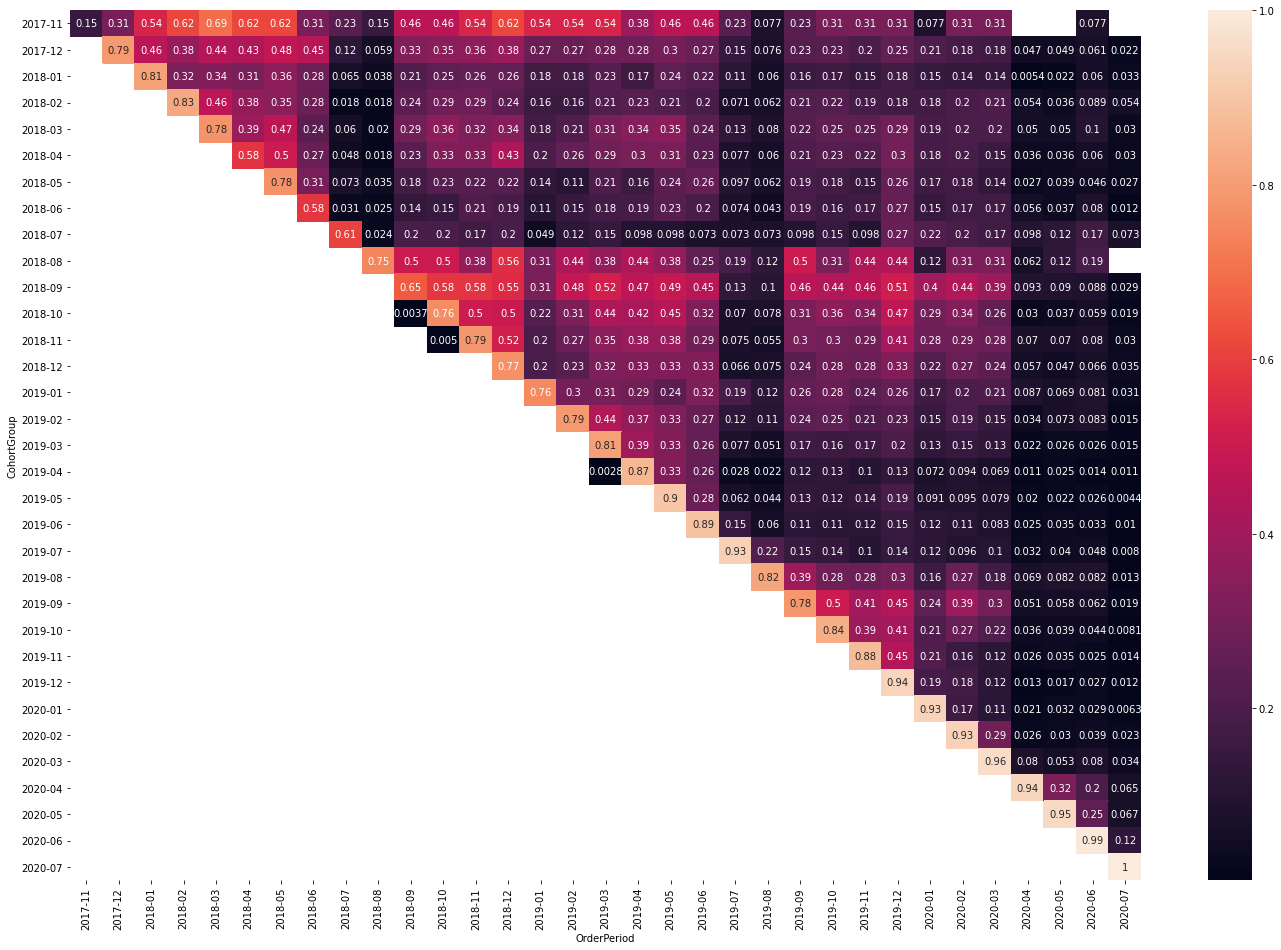

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(24, 16))
sns.heatmap(results, mask=results.isnull(), annot=True)